# K Nearest Neighbor Modeling

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(10,8)})

# Label/Feature Split

In [3]:
df = pd.read_csv('../features_3_sec.csv')

labels_series = df['label']
features_df = df.drop(['filename','length','label'], axis=1)
features_df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


In [4]:
label_map = {np.unique(labels_series)[i]:i for i in range(10)}
labels_series = labels_series.map(lambda i: label_map[i])

In [5]:
features_scaled_nparray = StandardScaler().fit_transform(features_df)
features_scaled_df = pd.DataFrame(features_scaled_nparray)
features_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.487808,0.640520,-0.006624,0.235568,-0.566828,-0.572791,-0.493983,-0.009229,-0.518590,-0.367952,...,-0.750122,-0.299108,0.168647,-0.425137,-0.003423,-0.376938,-0.499464,-0.513562,0.128414,-0.291781
1,-0.403142,0.131835,-0.264944,-0.342134,-0.508798,-0.749862,-0.425382,-0.519010,-0.424118,-0.642268,...,0.457983,0.428544,-0.327031,-0.310040,-0.112125,-0.032083,-0.066593,1.011384,1.275780,0.056425
2,-0.361694,0.764491,0.016695,0.542195,-0.546245,-0.701852,-0.288365,-0.425734,-0.346190,-0.562723,...,0.585548,0.503695,0.428053,-0.648762,0.316311,-0.177372,0.109337,-0.046244,0.653907,-0.521458
3,-0.175714,0.205477,0.024885,-0.063820,-0.723482,-0.700599,-0.517344,-0.348881,-0.607665,-0.474804,...,-0.489524,-0.065309,0.062981,-0.649076,0.092384,-0.464121,-0.211882,-0.099501,0.865880,-0.544744
4,-0.485895,0.337521,0.181345,-0.272072,-0.756246,-0.774827,-0.538557,-0.572962,-0.667537,-0.683920,...,0.112417,-0.570609,0.856651,-0.167089,0.183265,-0.029476,-0.175130,-0.678995,0.276899,-0.606692


# KNN Training

In [6]:
X_train,X_test,y_train,y_test = train_test_split(features_scaled_df, labels_series, test_size = 0.2)

In [7]:
print(X_train.shape)
print(X_test.shape)

(7992, 57)
(1998, 57)


In [8]:
scores_list1 = []
scores_list2 = []
best_model = None
best_accuracy = 0
kstar = None
pstar = None
for p in range(1,3):
    for k in range(1,16): 
        knn = KNeighborsClassifier(n_neighbors=k, p=p)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        test_acc = accuracy_score(y_test,y_pred)
        if p == 1:
            scores_list1.append(test_acc)
        else:
            scores_list2.append(test_acc)
        if test_acc > best_accuracy: # and k >= 5:
            best_model = knn
            best_accuracy = test_acc
            kstar = k
            pstar = p
print(f'Best Model = {best_model} Best k = {kstar} Best Accuracy = {best_accuracy}')

Best Model = KNeighborsClassifier(n_neighbors=1, p=1) Best k = 1 Best Accuracy = 0.9279279279279279


# Optimal Hyperparameters

Text(0.5, 1.0, 'Test Accuracy With Distance Measure: Manhattan')

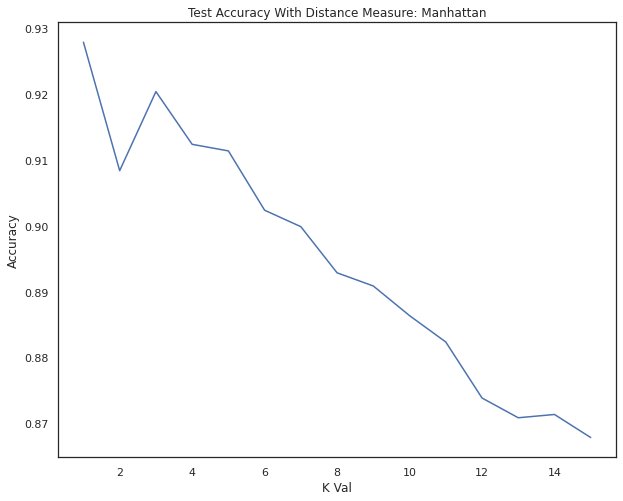

In [9]:
plt.plot(range(1,16),scores_list1)
plt.xlabel('K Val')
plt.ylabel('Accuracy')
plt.title('Test Accuracy With Distance Measure: Manhattan')

Text(0.5, 1.0, 'Test Accuracy With Distance Measure: Euclidean')

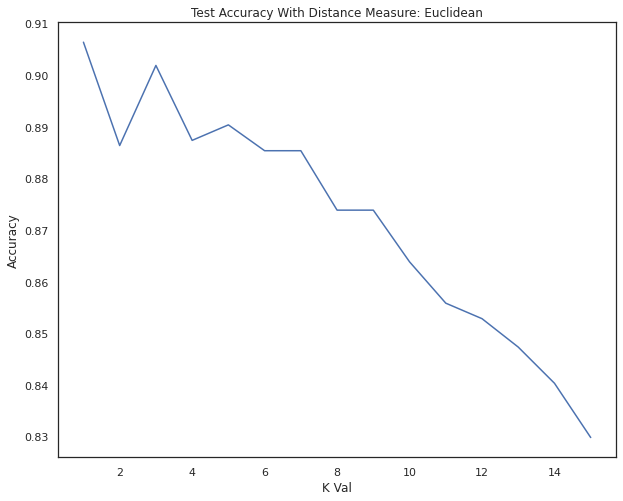

In [10]:
plt.plot(range(1,16),scores_list2)
plt.xlabel('K Val')
plt.ylabel('Accuracy')
plt.title('Test Accuracy With Distance Measure: Euclidean')

# Confusion Matrix

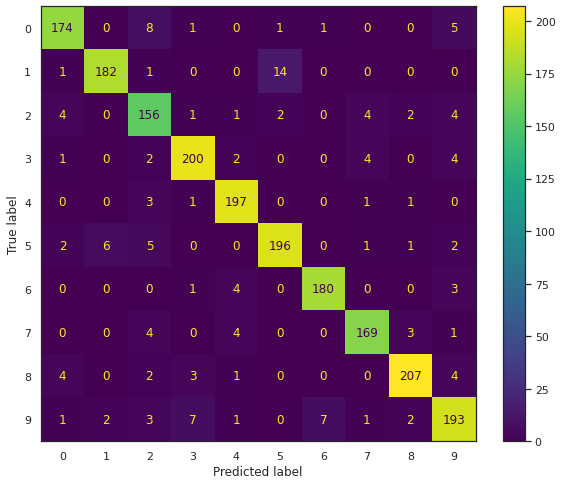

In [11]:
preds = best_model.predict(X_test)
accuracy = accuracy_score(preds, y_test)
confusion_mat = confusion_matrix(preds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()

# Real Talk: How am I not Overfitting??? I'll take it though

In [12]:
train_y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, train_y_pred)
print(f"Test Acc: {best_accuracy} Train Acc: {train_acc}")

Test Acc: 0.9279279279279279 Train Acc: 0.9992492492492493


# Accuracy For Predicting Each Label (Code from Daniel <3)

       label  accuracy
8     reggae  0.958333
1  classical  0.957895
6      metal  0.957447
7        pop  0.938889
4     hiphop  0.938095
3      disco  0.934579
0      blues  0.930481
5       jazz  0.920188
9       rock  0.893519
2    country  0.847826


<BarContainer object of 10 artists>

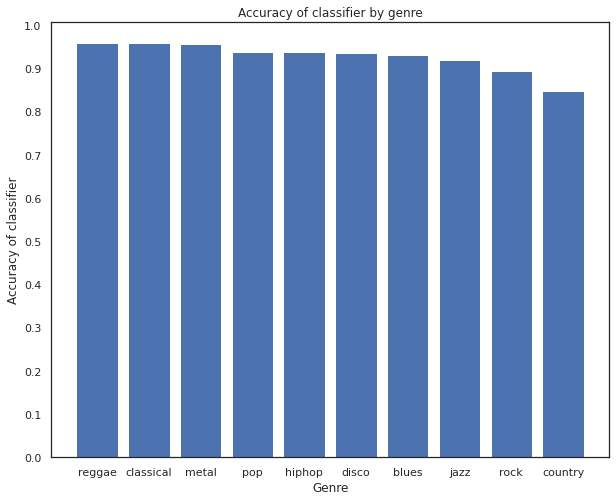

In [13]:
diag_entries = [confusion_mat[i,i] for i in range(len(confusion_mat))]
class_accuracy = diag_entries / np.sum(confusion_mat, axis=0)
label_names = list(label_map.keys())

acc_df = pd.DataFrame({'label':label_names, 'accuracy':class_accuracy})
acc_df = acc_df.sort_values(by='accuracy', ascending=False)
print(acc_df)

plt.xlabel('Genre')
plt.ylabel('Accuracy of classifier')

plt.yticks(np.arange(0,1.05,step=0.1))

plt.title('Accuracy of classifier by genre')
plt.bar(acc_df['label'], acc_df['accuracy'])